# The first case when $g(x) = 0$



Composite function:
\begin{equation}
    \min_{x \in Q} f(x) + g(x)
\end{equation}
where $g(x) \equiv 0$, $f(x)$ - relatively smooth function respect to some distance generating function.



### Compute $g(x)$, $∇g(x)$:
Consider function where $x \in Q$, $ A_{i}  \in \mathbb{R}^{n \times n}$ is symmetric :
\begin{equation}
    g(x) = \frac{1}{4}\sum_{k=1}^{m} (x^{T}A_{i}x - b_{i})^{2}
\end{equation}
We need to find:
\begin{equation}
\min_{x \in Q} g(x)
\end{equation}

Compute the gradient of g:
\begin{equation}
    \nabla g(x) = \sum_{k=1}^{m} (x^{T}A_{i}x - b_{i})A_{i}x
\end{equation}

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import grad

In [ ]:
# Compute the value of g(x)
# def g(x: jnp.ndarray, A: jnp.ndarray, b: jnp.ndarray) -> jnp.float32:
#     def single_term(Ai, bi):
#         return (1/4) * (jnp.dot(x.T, jnp.dot(Ai, x)) - bi) ** 2
#     return jnp.sum(jnp.array([single_term(Ai, bi) for Ai, bi in zip(A, b)]))
def g(x: np.array, A: np.array, b: np.array) -> np.float32:
    return np.sum(1/4 * (x.T @ A @ x - b) ** 2)


In [ ]:

# Compute the gradient of g(x) given x
def grad_g(x: np.array, A: np.array, b: np.array) -> np.array:
  return np.sum([((x.T @ Ai @ x - bi) * Ai @ x) for Ai, bi in zip(A, b)], axis=0)

### Compute $h(x)$, $∇h(x)$, $D(y,x)$:
Function h:
\begin{equation}
    h(x) = \frac{1}{4} \|x\|_2^4 + \frac{1}{2}\|x\|_2^2
\end{equation}
Compute the gradient of d:
\begin{equation}
    \nabla h(x) = (\|x\|_2^2 + 1)x
\end{equation}

Bregman divergence d:
\begin{equation}
    D(y,x) = h(y) - h(x) - \langle \nabla h(x), y - x \rangle
\end{equation}

In [ ]:
# Compute the value of h(x):
# def h(x: jnp.ndarray) -> jnp.float32:
#     l2_norm = jnp.linalg.norm(x)
#     return 1/4 * l2_norm ** 4 + 1/2 * l2_norm ** 2
def h(x: np.array) -> np.float32:
  l2_norm = np.linalg.norm(x)
  return 1/4 * l2_norm ** 4 + 1/2 * l2_norm ** 2

In [ ]:
# Compute the gradient of h(x):
def grad_h(x: np.array) -> np.array:
  l2_norm = np.linalg.norm(x)
  return (l2_norm ** 2 + 1) * x
# grad_g = grad(g)
# grad_h = grad(h)

In [ ]:
# Compute Bregman divergence:
# def D(y: jnp.ndarray, x: jnp.ndarray) -> jnp.float32:
#     return h(y) - h(x) - jnp.dot(grad_h(x), y - x)
def D(y, x):
  return h(y) - h(x) - grad_h(x) @ (y - x)

### L-smad condition:
<br>
Lemma 5.1: Let $g$ and $h$ as defined above. Then, for any $L$ satisfying:
\begin{equation}
    L \geq \sum_{k=1}^{m} (3\|A_i\|^2+\|A_i\||b_i|)
\end{equation}
the function $Lh - g$ is convex on $\mathbb{R}^n$


In [ ]:
# Compute the L min value
# def L_min(A: jnp.ndarray, b: jnp.ndarray) -> jnp.float32:
#     norms_A = jnp.array([jnp.linalg.norm(matrix) for matrix in A])
#     return jnp.sum(3 * norms_A ** 2 + norms_A * b)
def L_min(A: np.array, b: np.array) -> np.float32:
  norms_A = np.array([np.linalg.norm(matrix) for matrix in A])
  return np.sum(3 * norms_A ** 2 + norms_A * b)

### Compute argmin:
Using Proposition 5.1. Consider $f = 0 = θ\|.\|_1$ and $θ = 0$:

\begin{equation}
    T(x) = \textrm{arg min}_{u \in Q} \{\langle \nabla g(x), u - x \rangle + LD(u, x)\}
\end{equation}

\begin{equation}
    p = p_L(x) = \frac{1}{L}∇g(x) - ∇h(x)
\end{equation}


Using result from Proposition 5.1, we obtain that if we want to get:
\begin{equation}
    x^+ = \textrm{arg min}_{u \in Q} \{\langle p,u \rangle + \frac{1}{4} \|x\|_2^4 + \frac{1}{2}\|x\|_2^2\}
\end{equation}

then, by the first order global optimality condition for the
strongly convex problem:
\begin{equation}
    x_i^+(1 + \|x\|_2^2) + p_i = 0
\end{equation}
<br>
Using Proposition 5.1:
\begin{equation}
    v(x) := S_0(p) = \textrm{arg min}_{x \in Q} \{\frac{1}{2}\|x - p\|_2^2\} = \max \left\{ \left| p \right|, 0 \right\}\operatorname{sgn}(p) = p
\end{equation}
<br>
So in this case $x^+ = -tv(x) = -tp$, where $t$ will be the positive root of:
\begin{equation}
    t^3\|p\|_2^2+t-1=0, p = \frac{1}{L}∇g(x) - ∇h(x)
\end{equation}




### Solve the depressed cubic equation (Cardano's Method):
If we put $\|p\|_2^2 = a \geq 0$, the we get the depressed cubic equation:
\begin{equation}
    at^3+t-1=0
\end{equation}
which has one positive real root:
\begin{equation}
   t = \sqrt[3]{\frac{\frac{1}{a} + \sqrt{\frac{1}{a^2} + \frac{4}{27a^3}}}{2}} - \sqrt[3]{\frac{\frac{-1}{a} + \sqrt{\frac{1}{a^2} + \frac{4}{27a^3}}}{2}}
\end{equation}

\begin{equation}
   ⇔ t = \sqrt[3]{\frac{\frac{1}{a} + \sqrt{\frac{1}{a^2} + \frac{4}{27a^3}}}{2}} - \sqrt[3]{\frac{\frac{2}{27a^3}}{(\frac{1}{a} + \sqrt{\frac{1}{a^2} + \frac{4}{27a^3}})}}
\end{equation}

=> This will help solve the case when a >> 1.





In [ ]:
def solve_cubic_equation(a):
  if a == 0:
    return 1
  sqrt = (1/(a**2) + 4/(27*a**3)) ** (1./2.)
  x = ((1/a + sqrt)/2)**(1./3.)
  y = ((2/(27*a**3))/(1/a + sqrt))**(1./3.)
  return x - y

In [ ]:
print(solve_cubic_equation(4))

0.5


In [ ]:
def grad_inexact(grad, x, Delta):
  n = len(x)
  delta_grad = np.random.normal(0, 1, (n,))
  delta_grad /= np.linalg.norm(delta_grad)
  return grad + Delta * delta_grad

### Implement the adaptive algorithm:
1. Input $x_{0}$, $L_{0}$.
2. $L_{k+1} := \frac{L_{k}}{2}$
3. Calculate:
$ x_{k+1} \leftarrow   \textrm{arg min}_{u \in Q} \{ \langle \nabla_{\Delta} g(x_{k}), u - x_{k} \rangle + L_{k+1}D(u, x_{k})\} $

4. If the following inequality holds:
$ g(x_{k+1})  \leq g(x_{k}) + \langle \nabla_{\Delta} g(x_{k}), x_{k+1}-x_{k} \rangle + L_{k+1}D(x_{k+1}, x_{k}) + \Delta $
then $k:=k+1$ and go to Step 2. Otherwise, $L_{k + 1} := 2L_{k + 1}$ and go to Step 3.
                     


### Code:

In [ ]:
def adaptiveL(x, L, Delta, A, b):
  p = (1/L) * grad_inexact(grad_g(x, A, b), x, Delta) - grad_h(x)
  a = np.linalg.norm(p) ** 2
  t = solve_cubic_equation(a)
  x_new = (-1) * t * p
  g_x = g(x, A, b)
  while g(x_new, A, b) > g_x + grad_inexact(grad_g(x, A, b), x, Delta) @ (x_new - x) + L * D(x_new, x) + Delta:
    L *= 2
    p = (1/L) * grad_inexact(grad_g(x, A, b), x, Delta) - grad_h(x)
    a = np.linalg.norm(p) ** 2
    t = solve_cubic_equation(a)
    x_new = (-1) * t * p
  return 0.5 * L, x_new, D(x, x_new)


In [ ]:
import time

In [ ]:
def algorithm_adaptiveL(x_old, L_old, Delta, A, b, num_iterations = 100):
  Fx_N = []
  min_V = float('inf')
  min_V_numerical = []
  min_V_theoretical = []
  time_measure = []
  f_0 = g(x_old, A, b)
  sum_L = 0
  for i in range(num_iterations):
    # D: V(x_k+1, x_k)
    start = time.time()
    L_new, x_new, V = adaptiveL(x_old, L_old, Delta, A, b)


    f_x = g(x_new, A, b)
    Fx_N.append(f_x)
    min_V = min(min_V, V)
    min_V_numerical.append(min_V)

    sum_L += L_new
    if i >= 1:
      estimate_V_theoretical = (f_0 - f_x) / sum_L + i * Delta / sum_L
      min_V_theoretical.append(estimate_V_theoretical)


    L_old, x_old = L_new, x_new
    end = time.time()
    if i == 0:
      time_measure.append(end - start)
    else:
      time_measure.append(time_measure[i - 1] + end - start)

  # return L, x, minV
  return L_new, x_new, Fx_N, min_V_numerical, min_V_theoretical, time_measure

# The second case when $ f(x) \neq 0$

Composite function:
\begin{equation}
    \min_{x \in Q} f(x) + g(x)
\end{equation}
where $f = θ\|.\|_1$ is a convex l1-norm regularization, $g(x) = \frac{1}{4}\sum_{k=1}^{m} (x^{T}A_{i}x - b_{i})^{2}$



### Implement the algorithm:
1. Input $x_{0}$, $\lambda$.
2. Calculate:
$ x_{k+1} \leftarrow   \textrm{arg min}_{u \in Q} \{f(u) + \langle \nabla_{\Delta} g(x_{k}), u - x_{k} \rangle + \frac{1}{\lambda}D(u, x_{k})\} $

                     


### Compute argmin:
Using Proposition 5.1. (Bregman Proximal Formula for the l1-norm regularization) Consider $f = θ\|.\|_1$:

\begin{equation}
    x^+ = \textrm{arg min}_{u \in Q} \{θ\|u\|_1 + \langle \nabla g(x), u - x \rangle + \frac{1}{\lambda}D(u, x)\}
\end{equation}

\begin{equation}
    p = p_\lambda(x) = \lambda∇g(x) - ∇h(x)
\end{equation}


We want to obtain $x^+$ such that:
\begin{equation}
    x^+ = \textrm{arg min}_{u \in Q} \{\lambdaθ\|u\|_1 + \langle p,u \rangle + \frac{1}{4} \|x\|_2^4 + \frac{1}{2}\|x\|_2^2\}
\end{equation}

Using result from Proposition 5.1:
\begin{equation}
    x^+ = -t^*v(x)
\end{equation}
where,
\begin{equation}
    \ v(x):=S_{\lambdaθ}(p) := \textrm{arg min}_{x \in Q} \{\lambdaθ\|x\|_1 + \frac{1}{2}\|x - p\|_2^2\} = \max \left\{ \left| p \right| - \lambdaθ, 0 \right\}\operatorname{sgn}(p)
\end{equation}
and $t^*$ is the positive root of equation:
\begin{equation}
    t^3\|v\|_2^2+t-1=0, p = \lambda∇g(x) - ∇h(x)
\end{equation}

Soft-thresholding (with parameter $τ$ ). For any $y ∈ R$:
\begin{equation}
S_τ(y) = \textrm{arg min}_{x \in Q} \{\tau\|x\|_1 + \frac{1}{2}\|x - y\|_2^2\} = \max \left\{ \left| y \right| - \tau, 0 \right\}\operatorname{sgn}(y)
\end{equation}

In [ ]:
def soft_thresholding(tau, y: np.array) -> np.array:
  return np.maximum(np.abs(y) - tau, 0) * np.sign(y)

In [ ]:
def algorithm_composite_problem(x_old, lamb, Delta, theta, A, b, num_iterations):
  Fx_N = []
  min_V = float('inf')
  min_V_numerical = []
  min_V_theoretical = []
  f_0 = theta * np.linalg.norm(x_old, ord=1) + g(x_old, A, b)
  for i in range(num_iterations):
    p = lamb * grad_inexact(grad_g(x_old, A, b), x_old, Delta) - grad_h(x_old)
    v_x = soft_thresholding(lamb * theta, p)
    a = np.linalg.norm(v_x) ** 2
    t = solve_cubic_equation(a)
    x_new = (-1) * t * v_x
    V = D(x_old, x_new)


    f_x = theta * np.linalg.norm(x_new, ord=1) + g(x_new, A, b)
    Fx_N.append(f_x)
    min_V = min(min_V, V)
    min_V_numerical.append(min_V)

    if i >= 1:
      estimate_V_theoretical = (f_0 - f_x) * lamb / i + Delta * lamb
      min_V_theoretical.append(estimate_V_theoretical)


    x_old = x_new

  return x_new, Fx_N, min_V_numerical, min_V_theoretical

In [ ]:
# def adaptiveL(x, L, Delta, A, b):
#   p = (1/L) * grad_inexact(grad_g(x, A, b), x, Delta) - grad_h(x)
#   a = np.linalg.norm(p) ** 2
#   t = solve_cubic_equation(a)
#   x_new = (-1) * t * p
#   g_x = g(x, A, b)
#   while g(x_new, A, b) > g_x + grad_inexact(grad_g(x, A, b), x, Delta) @ (x_new - x) + L * D(x_new, x) + Delta:
#     L *= 2
#     p = (1/L) * grad_inexact(grad_g(x, A, b), x, Delta) - grad_h(x)
#     a = np.linalg.norm(p) ** 2
#     t = solve_cubic_equation(a)
#     x_new = (-1) * t * p
#   return 0.5 * L, x_new, D(x_new, x)


In [ ]:
def non_adaptive_algorithm(x_old, lamb, Delta, A, b, num_iterations):
  Fx_N = []
  min_V = float('inf')
  min_V_numerical = []
  min_V_theoretical = []
  time_measure = []
  f_0 = g(x_old, A, b)
  for i in range(num_iterations):
    start = time.time()
    p = lamb * grad_inexact(grad_g(x_old, A, b), x_old, Delta) - grad_h(x_old)
    a = np.linalg.norm(p) ** 2
    t = solve_cubic_equation(a)
    x_new = (-1) * t * p
    V = D(x_old, x_new)


    f_x = g(x_new, A, b)
    Fx_N.append(f_x)
    min_V = min(min_V, V)
    min_V_numerical.append(min_V)

    if i >= 1:
      estimate_V_theoretical = (f_0 - f_x) * lamb / i + Delta * lamb
      min_V_theoretical.append(estimate_V_theoretical)

    x_old = x_new
    end = time.time()
    if i == 0:
      time_measure.append(end - start)
    else:
      time_measure.append(time_measure[i - 1] + end - start)
  return x_new, Fx_N, min_V_numerical, min_V_theoretical, time_measure


In [ ]:
x = np.array([1, 2, -3])
print(np.linalg.norm(x, ord=1))

6.0


# Run two algorithms and compare the results:

In [ ]:
def generate_sparse_matrix(size, number_non_zero_entries):
  diagonal_values = np.random.rand(size)  # Random values for the diagonal elements
  diagonal_matrix = np.diag(diagonal_values)

  non_zero_entries = set()
  while len(non_zero_entries) < number_non_zero_entries:
    row = np.random.randint(0, size)
    column = np.random.randint(0, size)
    if row != column and (row, column) not in non_zero_entries:
      non_zero_entries.add((row, column))
      diagonal_matrix[row][column] = np.random.rand()
  return diagonal_matrix


In [ ]:
print(generate_sparse_matrix(4, 2))


[[1.96427263e-01 3.92071410e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.87798752e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.74713920e-01 0.00000000e+00]
 [0.00000000e+00 7.78397965e-01 0.00000000e+00 8.52849822e-01]]


In [ ]:
# n = 100 #size of matrix
# k = 10 #number of matrix
# Delta = 1e-1
# np.random.seed(1)
# # Matrix A_i is symmetric and sparse
# A = [generate_sparse_matrix(n, n//2) for _ in range(k)]
# A_sym = [(X + X.T)/2 for X in A]
# A_jax = jnp.array(A_sym)
# b = np.random.randn(k)
# b_jax = jnp.array(b)
# # Initial values x_0, L_0:
# x0 = np.random.randn(n)
# x0_jax = jnp.array(x0)
# L0 = L_min(A_sym, b) / 10
# number_of_iterations = 100




In [ ]:
n = 1000 #size of matrix
k = 10 #number of matrix
Delta = 1e-1
np.random.seed(1)
# Matrix A_i is symmetric and sparse
A = [generate_sparse_matrix(n, n//2) for _ in range(k)]
A_sym = [(X + X.T)/2 for X in A]
b = np.random.randn(k)
# Initial values x_0, L_0:
x0 = np.random.randn(n)
L0 = L_min(A_sym, b) / 500
number_of_iterations = 1000

In [ ]:
# g(x0_jax * 2, A_jax, b_jax)

In [ ]:
# L, x, Fx_N_adaptive, min_V_numerical_adaptive, min_V_theoretical_adaptive, time_adaptive = algorithm_adaptiveL(x0_jax, L0, Delta, A_jax, b_jax, number_of_iterations)
# print(f"Value of L_k+1: {L}")
# print("F(x_N) by adaptive algorithm", g(x, A_jax, b_jax))


# theta = 0
# x_non_adaptive = []
# Fx_N_non_adaptive = []
# min_V_numerical_non_adaptive = []
# min_V_theoretical_non_adaptive = []

# x, F, min_V_numerical, min_V_theoretical, time_non = non_adaptive_algorithm(x0_jax, 1/L0, Delta, A_jax, b_jax, number_of_iterations)
# print("F(x_N) by non adaptive algorithm with value of L: ", g(x, A_jax, b_jax))




In [ ]:
theta = 0
x, F, min_V_numerical, min_V_theoretical, time_non = non_adaptive_algorithm(x0, 1/L0, Delta, A_sym, b, number_of_iterations)

print("F(x_N) by non adaptive algorithm with value of L: ", L0, g(x, A_sym, b))


L, x, Fx_N_adaptive, min_V_numerical_adaptive, min_V_theoretical_adaptive, time_adaptive = algorithm_adaptiveL(x0, 10, Delta, A_sym, b, number_of_iterations)
print(f"Value of L_k+1: {L}")
print("F(x_N) by adaptive algorithm", g(x, A_sym, b))





F(x_N) by non adaptive algorithm with value of L:  24.86365023468177 2.5925711199543717
Value of L_k+1: 0.625
F(x_N) by adaptive algorithm 2.619134356761565


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# x = np.arange(0, number_of_iterations, 1)
# y1 = np.array(Fx_N_adaptive)
# y2 = np.array(F)


# # Plot the first line
# plt.plot(x, y1, label='Adaptive algorithm')
# plt.plot(x, y2, label='Non Adaptive algorithm')



# # Add title and labels
# plt.title('Value of F(x_N)')
# plt.xlabel('N')
# plt.ylabel('F(x_N)')

# # Add legend
# plt.legend()

In [ ]:
print(F[980:])

[2.5928315941729414, 2.5928174216979434, 2.5928027392139352, 2.59278764557673, 2.5927726548364913, 2.59275902872212, 2.592746109562371, 2.592729094232687, 2.59271607549051, 2.5927005637264635, 2.592687986726237, 2.592671738997608, 2.592662003540801, 2.5926472702478356, 2.5926343123428235, 2.592621246144807, 2.5926092491340778, 2.592596133049615, 2.59258215249177, 2.5925711199543717]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


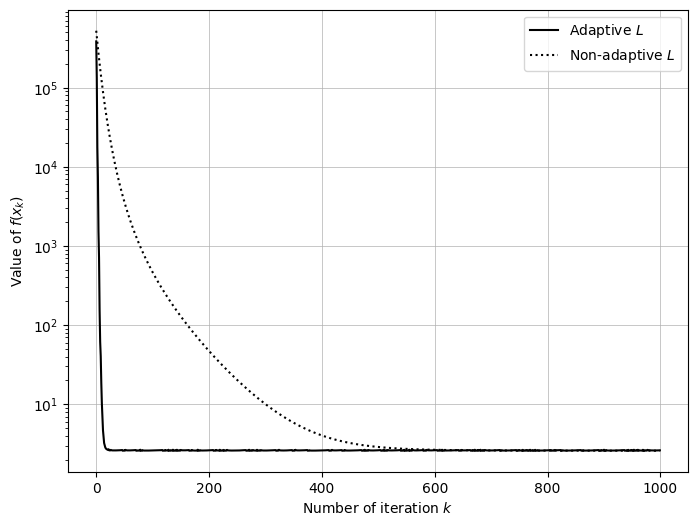

In [ ]:
from google.colab import drive
x = np.arange(0, number_of_iterations, 1)
y1 = np.array(Fx_N_adaptive)
y2 = np.array(F)

# Plot the lines
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='Adaptive $L$', color='black')
plt.plot(x, y2, label='Non-adaptive $L$', linestyle=':', color='black')


# Set logarithmic scale for y-axis
# plt.yscale('log')

# Add title and labels
plt.xlabel('Number of iteration $k$')
plt.ylabel('Value of $f(x_k)$')
plt.yscale('log')

# Add legend
plt.legend()

# Display grid
plt.grid(True, ls="-", linewidth=0.5)
drive.mount('/content/drive')
plt.savefig('/content/drive/My Drive/fig-f(x_k).png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


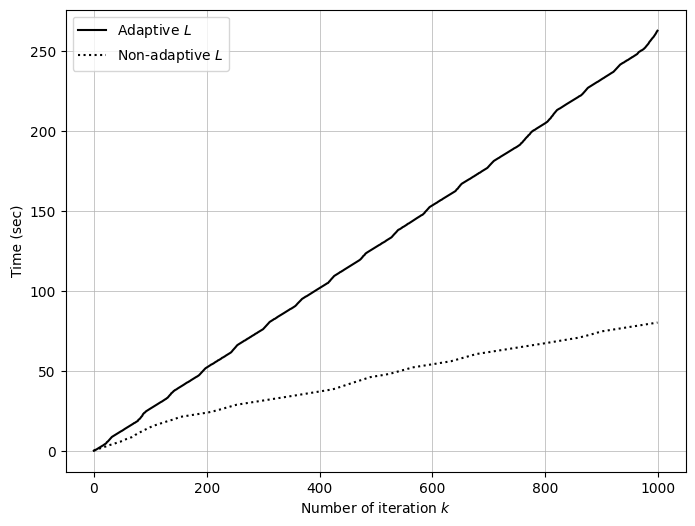

In [ ]:
from google.colab import drive
x = np.arange(0, number_of_iterations, 1)
y1 = np.array(time_adaptive)
y2 = np.array(time_non)

# Plot the lines
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='Adaptive $L$', color='black')
plt.plot(x, y2, label='Non-adaptive $L$', linestyle=':', color='black')


# Set logarithmic scale for y-axis
# plt.yscale('log')

# Add title and labels
plt.xlabel('Number of iteration $k$')
plt.ylabel('Time (sec)')
# plt.yscale('log')

# Add legend
plt.legend()

# Display grid
plt.grid(True, ls="-", linewidth=0.5)
drive.mount('/content/drive')
plt.savefig('/content/drive/My Drive/fig-time.png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


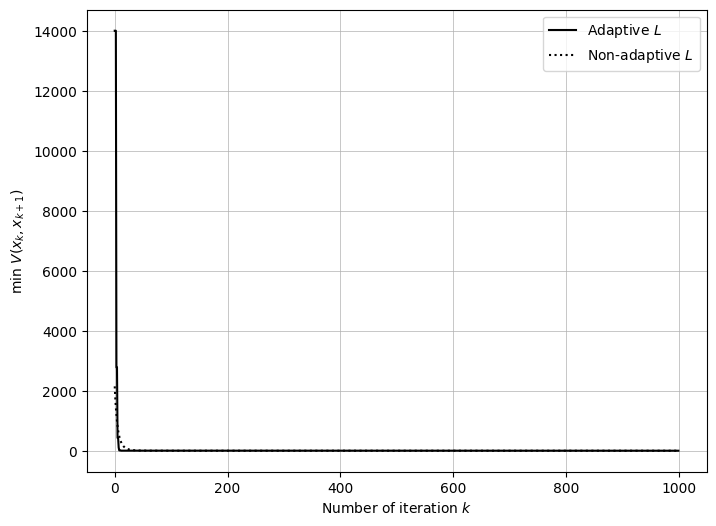

In [ ]:
from google.colab import drive
x = np.arange(0, number_of_iterations, 1)
y1 = np.array(min_V_numerical_adaptive)
y2 = np.array(min_V_numerical)

# Plot the lines
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='Adaptive $L$', color='black')
plt.plot(x, y2, label='Non-adaptive $L$', linestyle=':', color='black')


# Set logarithmic scale for y-axis
# plt.yscale('log')

# Add title and labels
plt.xlabel('Number of iteration $k$')
plt.ylabel('min $V(x_{k}, x_{k + 1})$')
# plt.yscale('log')

# Add legend
plt.legend()

# Display grid
plt.grid(True, ls="-", linewidth=0.5)
drive.mount('/content/drive')
plt.savefig('/content/drive/My Drive/fig-minV.png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


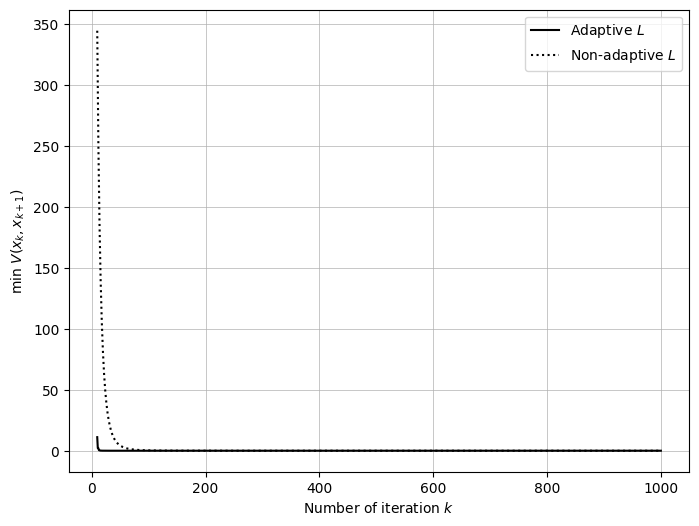

In [ ]:
from google.colab import drive
x = np.arange(10, number_of_iterations, 1)
y1 = np.array(min_V_numerical_adaptive[10:])
y2 = np.array(min_V_numerical[10:])

# Plot the lines
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='Adaptive $L$', color='black')
plt.plot(x, y2, label='Non-adaptive $L$', linestyle=':', color='black')


# Set logarithmic scale for y-axis
# plt.yscale('log')

# Add title and labels
plt.xlabel('Number of iteration $k$')
plt.ylabel('min $V(x_{k}, x_{k + 1})$')
# plt.yscale('log')

# Add legend
plt.legend()

# Display grid
plt.grid(True, ls="-", linewidth=0.5)
drive.mount('/content/drive')
plt.savefig('/content/drive/My Drive/fig-minV-crop.png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

In [ ]:
print(min(min_V_numerical_adaptive))

0.0017498781385369248


In [ ]:
len(min_V_theoretical)

999

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


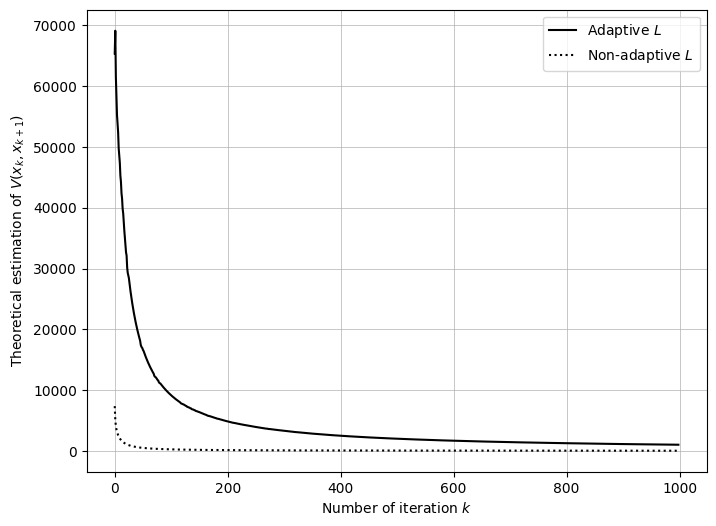

In [ ]:
from google.colab import drive
x = np.arange(0, number_of_iterations - 1, 1)
y1 = np.array(min_V_theoretical_adaptive)
y2 = np.array(min_V_theoretical)

# Plot the lines
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='Adaptive $L$', color='black')
plt.plot(x, y2, label='Non-adaptive $L$', linestyle=':', color='black')


# Set logarithmic scale for y-axis
# plt.yscale('log')

# Add title and labels
plt.xlabel('Number of iteration $k$')
plt.ylabel('Theoretical estimation of $V(x_{k}, x_{k + 1})$')
# plt.yscale('log')

# Add legend
plt.legend()

# Display grid
plt.grid(True, ls="-", linewidth=0.5)
drive.mount('/content/drive')
plt.savefig('/content/drive/My Drive/fig-theoretical_estimate.png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

In [ ]:
min_V_theoretical_adaptive[20]

32649.005090055398

In [ ]:
def stopping_rule_non_adaptive_algorithm(x_old, lamb, Delta, A, b, epsilon):
  V = 1e10
  time_measure = 0
  f_0 = g(x_old, A, b)
  i = 0
  while V > epsilon:
    start = time.time()
    p = lamb * grad_inexact(grad_g(x_old, A, b), x_old, Delta) - grad_h(x_old)
    a = np.linalg.norm(p) ** 2
    t = solve_cubic_equation(a)
    x_new = (-1) * t * p
    V = D(x_old, x_new)

    x_old = x_new
    end = time.time()
    time_measure += end - start
    i += 1
  return i, V, time_measure

In [ ]:
def stopping_rule_adaptive_algoritm(x_old, L, Delta, A, b, epsilon):
  V = 1e10
  time_measure = 0
  f_0 = g(x_old, A, b)
  i = 0
  L_old = L
  while V > epsilon:
    # D: V(x_k+1, x_k)
    start = time.time()
    L_new, x_new, V = adaptiveL(x_old, L_old, Delta, A, b)

    L_old, x_old = L_new, x_new
    end = time.time()

    time_measure += end - start
    i += 1
  return i, V, time_measure

In [ ]:
L0 = L_min(A_sym, b) / 500
Delta = 0.1

In [ ]:
epsilon = [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06, 1e-07]


for e in epsilon:
  N, V, time_needed = stopping_rule_non_adaptive_algorithm(x0, 1/L0, e, A_sym, b, e)
  print(f"Non-adaptive: When epsilon = {e} then N: {N}, min V: {V}, time needed: {time_needed}")
  print()


Non-adaptive: When epsilon = 0.1 then N: 133, min V: 0.09799087915260607, time needed: 2.981177568435669

Non-adaptive: When epsilon = 0.01 then N: 229, min V: 0.00983385661587688, time needed: 5.4354071617126465

Non-adaptive: When epsilon = 0.001 then N: 356, min V: 0.0009961874211820154, time needed: 8.77853798866272

Non-adaptive: When epsilon = 0.0001 then N: 497, min V: 9.915452229226213e-05, time needed: 12.603062629699707

Non-adaptive: When epsilon = 1e-05 then N: 645, min V: 9.86350755882541e-06, time needed: 15.583673238754272

Non-adaptive: When epsilon = 1e-06 then N: 840, min V: 9.943314485158343e-07, time needed: 22.137583255767822

Non-adaptive: When epsilon = 1e-07 then N: 1124, min V: 9.991930913750579e-08, time needed: 27.032551288604736



In [ ]:
for e in epsilon:
  N1, V1, time_needed1 = stopping_rule_adaptive_algoritm(x0, 10, e, A_sym, b, e)
  print(f"Adaptive: When epsilon = {e} then N: {N1}, min V: {V1}, time needed: {time_needed1}")
  print()

Adaptive: When epsilon = 0.1 then N: 19, min V: 0.06796470914403407, time needed: 4.871561765670776

Adaptive: When epsilon = 0.01 then N: 23, min V: 0.005446113909461919, time needed: 4.087460041046143

Adaptive: When epsilon = 0.001 then N: 29, min V: 0.0007631745603785701, time needed: 6.324114799499512

Adaptive: When epsilon = 0.0001 then N: 42, min V: 9.490307636803616e-05, time needed: 12.113146781921387

Adaptive: When epsilon = 1e-05 then N: 59, min V: 9.68104334640862e-06, time needed: 12.571793794631958

Adaptive: When epsilon = 1e-06 then N: 105, min V: 9.272636365610054e-07, time needed: 27.11829662322998

Adaptive: When epsilon = 1e-07 then N: 206, min V: 7.997412063188934e-08, time needed: 43.79077100753784

